In [5]:

# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/titanic.txt


In [6]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
titanics = np.genfromtxt('../input/titanic/titanic.txt',delimiter='\t',missing_values = None,dtype=str)

In [8]:
a="Male"
b="Yes"
if a == 'Male' and b =='Yes' :
    print("Male")
else:
    print("No")

Male


In [9]:
a = np.hstack ((np.array(['M','M','F']).reshape(3,1), 
               np.array(['Y','Y','N']).reshape(3,1)))
a

array([['M', 'Y'],
       ['M', 'Y'],
       ['F', 'N']], dtype='<U1')

In [10]:
titanics = np.delete(titanics,[1,3,6,7,8,9,10],1)

In [11]:
titanics[0,:]

array(['Passenger Class', 'Sex', 'No of Siblings or Spouses on Board',
       'No of Parents or Children on Board', 'Survived'], dtype='<U84')

In [12]:
sns.set()

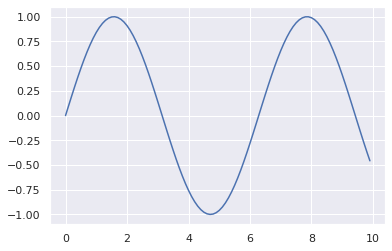

In [13]:
line1 = np.arange(0, 10,0.1);
line2 = np.sin(line1)
plt.plot(line1,line2)

(array([1210.,   62.,   37.]),
 array([0., 2., 4., 6.]),
 <BarContainer object of 3 artists>)

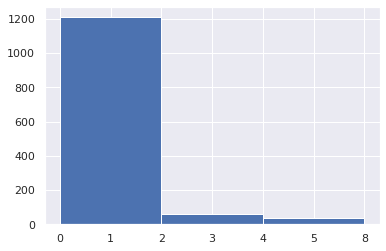

In [14]:
plt.hist(titanics[1:,2], bins=3)

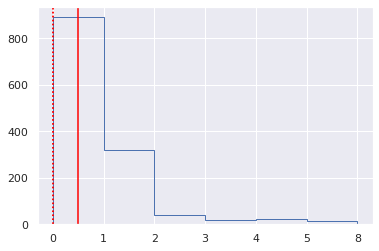

In [15]:
plt.hist(titanics[1:,2], bins=np.unique(titanics[1:,2]),  histtype='step')
plt.axvline(np.array([float(item) for item in titanics[1:,2]]).mean(), c='Red')
plt.axvline(np.percentile(np.array([float(item) for item in titanics[1:,2]]),0.75), c='Red',linestyle=':')
plt.axvline(np.percentile(np.array([float(item) for item in titanics[1:,2]]),0.25), c='Red',linestyle=':')

{'whiskers': [<matplotlib.lines.Line2D at 0x7f3c5c03c910>,
 'caps': [<matplotlib.lines.Line2D at 0x7f3c5c0460d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f3c5c03c650>],
 'medians': [<matplotlib.lines.Line2D at 0x7f3c5c046990>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f3c5c046d90>],
 'means': []}

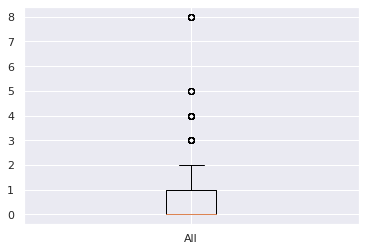

In [16]:
relative = np.array([float(item) for item in titanics[1:,2]])
plt.boxplot(relative, labels = ['All'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f3c4ffb33d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f3c4ffb3c50>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f3c4ffabf90>,
 'medians': [<matplotlib.lines.Line2D at 0x7f3c4ffbf550>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f3c4ffbf990>,
 'means': []}

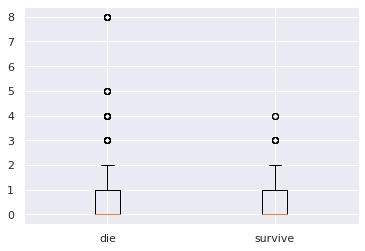

In [17]:
relative = np.array([float(item) for item in titanics[1:,2]])
survive = titanics[1:,-1]
plt.boxplot([relative[survive=='No'], relative[survive=='Yes'] ], labels = ['die','survive'])

In [18]:
import folium
world_map = folium.Map()
world_map

In [19]:
cmu_map = folium.Map(location = [18.7971238,98.9537993], zoom_start =15)
cmu_map

In [20]:
cmu_map = folium.Map(location = [18.7971238,98.9537993], zoom_start =15, tiles='Stamen Terrain')
cmu_map

In [21]:
folium.TileLayer('Open Street Map').add_to(cmu_map)
cmu_map

Ex. 1 Perform preprocessing as follows :

Set index of data to hn numbers

Remove missing values

Remove these unnecessary columns hiv, size, utmet, vgmet, surgery, pchemo

Change age into 2 values 'Young' (age <= 20) and 'Old' (age > 20)

Separate data into groups based on pmmet values

for each group, randomly choose 10 data******

In [30]:
data = pd.read_csv('https://raw.githubusercontent.com/plenoi/Clinic/master/ultima_all_clean.csv', sep=',')

In [31]:
data.isnull().any()

hn            False
age           False
parity        False
hiv            True
menopaus       True
disease       False
surgery       False
conization     True
OPDsize        True
appearance     True
stage          True
pchemo         True
Wardsize       True
finalhisto     True
nodeyiel       True
RHlvsi         True
depth          True
size           True
utmet          True
vgmargin       True
vgmet          True
pelvicme       True
pmmet          True
adnmet         True
dtype: bool

In [32]:
data = data.set_index('hn')
data

,age,parity,hiv,menopaus,disease,surgery,conization,OPDsize,appearance,stage,...,nodeyiel,RHlvsi,depth,size,utmet,vgmargin,vgmet,pelvicme,pmmet,adnmet
hn,,,,,,,,,,,,,,,,,,,,,
2631840,52,3,0.0,0.0,1,1,0.0,5.0,4.0,5.0,...,21.0,0.0,3.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0
2633481,32,2,0.0,0.0,0,1,0.0,5.0,1.0,5.0,...,11.0,0.0,3.0,5.0,0.0,0.0,0.0,1.0,0.0,2.0
2634477,52,2,0.0,0.0,0,0,0.0,5.0,NaN,5.0,...,35.0,6.0,3.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
2633633,38,2,0.0,0.0,0,0,0.0,2.0,1.0,4.0,...,20.0,16.0,3.0,3.8,0.0,0.0,0.0,0.0,0.0,2.0
2630496,55,3,0.0,1.0,0,0,1.0,0.0,5.0,4.0,...,17.0,9.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3169688,47,2,0.0,0.0,0,0,1.0,0.0,5.0,4.0,...,42.0,5.0,2.0,1.1,0.0,0.0,0.0,0.0,0.0,2.0
3167041,39,1,0.0,0.0,0,0,1.0,0.0,5.0,2.0,...,20.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,2.0
2623351,46,2,0.0,0.0,0,0,1.0,0.0,5.0,1.0,...,13.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
data = data.dropna(0,'any')
data.isnull().any()

age           False
parity        False
hiv           False
menopaus      False
disease       False
surgery       False
conization    False
OPDsize       False
appearance    False
stage         False
pchemo        False
Wardsize      False
finalhisto    False
nodeyiel      False
RHlvsi        False
depth         False
size          False
utmet         False
vgmargin      False
vgmet         False
pelvicme      False
pmmet         False
adnmet        False
dtype: bool

In [34]:
data = data.drop('hiv',1)
data = data.drop('size',1)
data = data.drop('utmet',1)
data = data.drop('vgmet',1)
data = data.drop('surgery',1)
data = data.drop('pchemo',1)
data

,age,parity,menopaus,disease,conization,OPDsize,appearance,stage,Wardsize,finalhisto,nodeyiel,RHlvsi,depth,vgmargin,pelvicme,pmmet,adnmet
hn,,,,,,,,,,,,,,,,,
2631840,52,3,0.0,1,0.0,5.0,4.0,5.0,5.0,3.0,21.0,0.0,3.0,0.0,0.0,0.0,0.0
2633481,32,2,0.0,0,0.0,5.0,1.0,5.0,5.0,1.0,11.0,0.0,3.0,0.0,1.0,0.0,2.0
2633633,38,2,0.0,0,0.0,2.0,1.0,4.0,3.0,3.0,20.0,16.0,3.0,0.0,0.0,0.0,2.0
2630496,55,3,1.0,0,1.0,0.0,5.0,4.0,0.0,1.0,17.0,9.0,3.0,0.0,1.0,0.0,0.0
2450167,67,5,1.0,1,0.0,3.0,2.0,4.0,3.0,1.0,34.0,38.0,3.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3812011,57,2,1.0,1,1.0,0.0,5.0,4.0,1.0,1.0,18.0,0.0,3.0,2.0,0.0,0.0,0.0
3813471,42,2,0.0,1,0.0,3.0,2.0,4.0,3.0,1.0,33.0,999.0,3.0,2.0,1.0,1.0,0.0
3812935,53,1,1.0,1,1.0,0.0,5.0,4.0,0.0,1.0,17.0,0.0,3.0,0.0,0.0,1.0,0.0


In [35]:
data['age'] = data['age'] <= 20
data['age'] = data['age'].replace(True,'Young').replace(False,'Old')
data

,age,parity,menopaus,disease,conization,OPDsize,appearance,stage,Wardsize,finalhisto,nodeyiel,RHlvsi,depth,vgmargin,pelvicme,pmmet,adnmet
hn,,,,,,,,,,,,,,,,,
2631840,Old,3,0.0,1,0.0,5.0,4.0,5.0,5.0,3.0,21.0,0.0,3.0,0.0,0.0,0.0,0.0
2633481,Old,2,0.0,0,0.0,5.0,1.0,5.0,5.0,1.0,11.0,0.0,3.0,0.0,1.0,0.0,2.0
2633633,Old,2,0.0,0,0.0,2.0,1.0,4.0,3.0,3.0,20.0,16.0,3.0,0.0,0.0,0.0,2.0
2630496,Old,3,1.0,0,1.0,0.0,5.0,4.0,0.0,1.0,17.0,9.0,3.0,0.0,1.0,0.0,0.0
2450167,Old,5,1.0,1,0.0,3.0,2.0,4.0,3.0,1.0,34.0,38.0,3.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3812011,Old,2,1.0,1,1.0,0.0,5.0,4.0,1.0,1.0,18.0,0.0,3.0,2.0,0.0,0.0,0.0
3813471,Old,2,0.0,1,0.0,3.0,2.0,4.0,3.0,1.0,33.0,999.0,3.0,2.0,1.0,1.0,0.0
3812935,Old,1,1.0,1,1.0,0.0,5.0,4.0,0.0,1.0,17.0,0.0,3.0,0.0,0.0,1.0,0.0


In [36]:
data_pm = data.groupby('pmmet').sample(n = 10)
data_pm

,age,parity,menopaus,disease,conization,OPDsize,appearance,stage,Wardsize,finalhisto,nodeyiel,RHlvsi,depth,vgmargin,pelvicme,pmmet,adnmet
hn,,,,,,,,,,,,,,,,,
3116877,Old,2,0.0,0,0.0,4.0,1.0,5.0,3.0,3.0,30.0,3.0,3.0,0.0,0.0,0.0,0.0
3533510,Old,2,0.0,0,0.0,3.0,1.0,4.0,3.0,1.0,32.0,6.0,3.0,0.0,1.0,0.0,0.0
3169643,Old,2,0.0,0,0.0,4.0,1.0,4.0,4.0,3.0,30.0,2.0,3.0,0.0,0.0,0.0,0.0
2954392,Old,4,0.0,0,1.0,3.0,2.0,4.0,3.0,1.0,28.0,35.0,3.0,0.0,0.0,0.0,0.0
2701895,Old,2,0.0,0,0.0,2.0,1.0,4.0,2.0,2.0,29.0,2.0,3.0,0.0,0.0,0.0,0.0
1083768,Old,3,0.0,1,0.0,3.0,2.0,4.0,3.0,1.0,56.0,0.0,2.0,0.0,0.0,0.0,0.0
3150909,Old,2,0.0,0,0.0,4.0,1.0,4.0,4.0,1.0,16.0,0.0,1.0,0.0,0.0,0.0,0.0
3122348,Old,3,1.0,1,0.0,0.0,5.0,4.0,0.0,1.0,27.0,10.0,3.0,0.0,0.0,0.0,0.0
2643353,Old,1,1.0,1,0.0,4.0,1.0,5.0,4.0,1.0,32.0,1.0,3.0,0.0,0.0,0.0,0.0


<AxesSubplot:xlabel='age'>

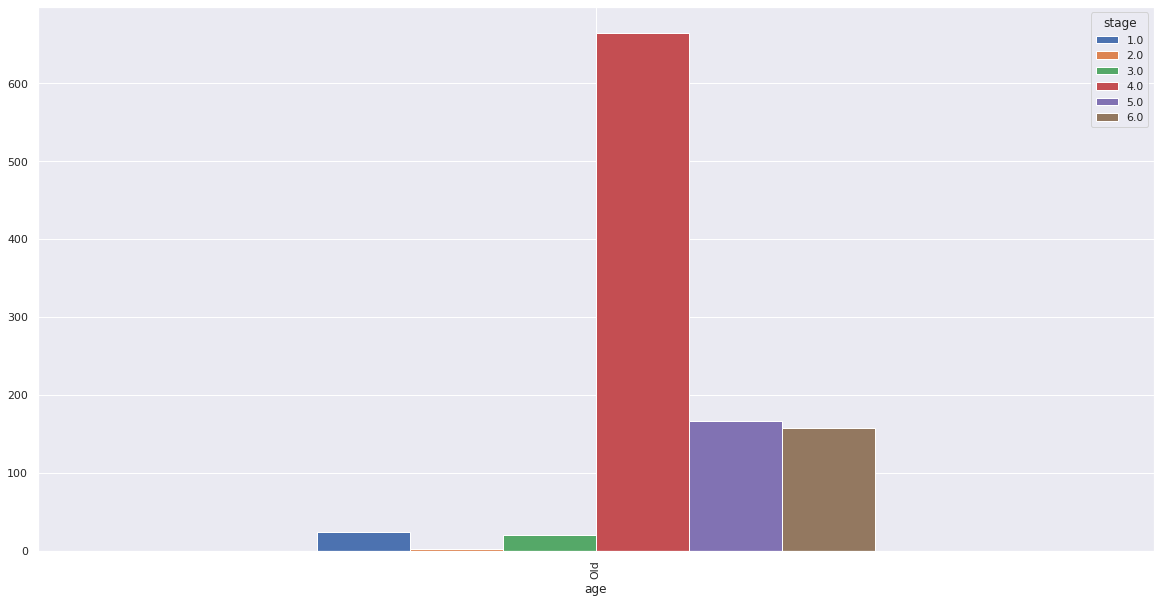

In [41]:
pd.crosstab(data['age'],data['stage']).plot(kind='bar',figsize=(20,10))

<AxesSubplot:xlabel='Wardsize'>

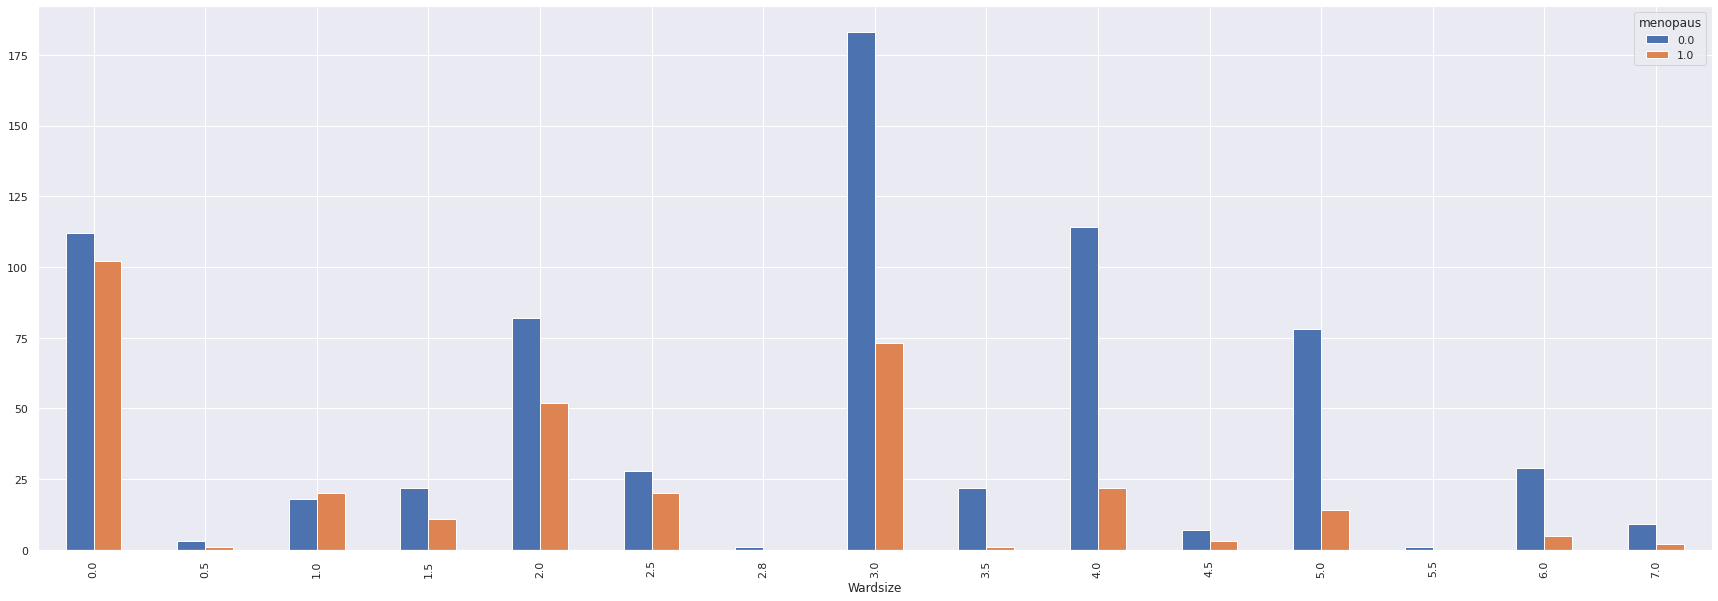

In [45]:
pd.crosstab(data['Wardsize'],data['menopaus']).plot(kind='bar',figsize=(30,10))

<AxesSubplot:xlabel='appearance'>

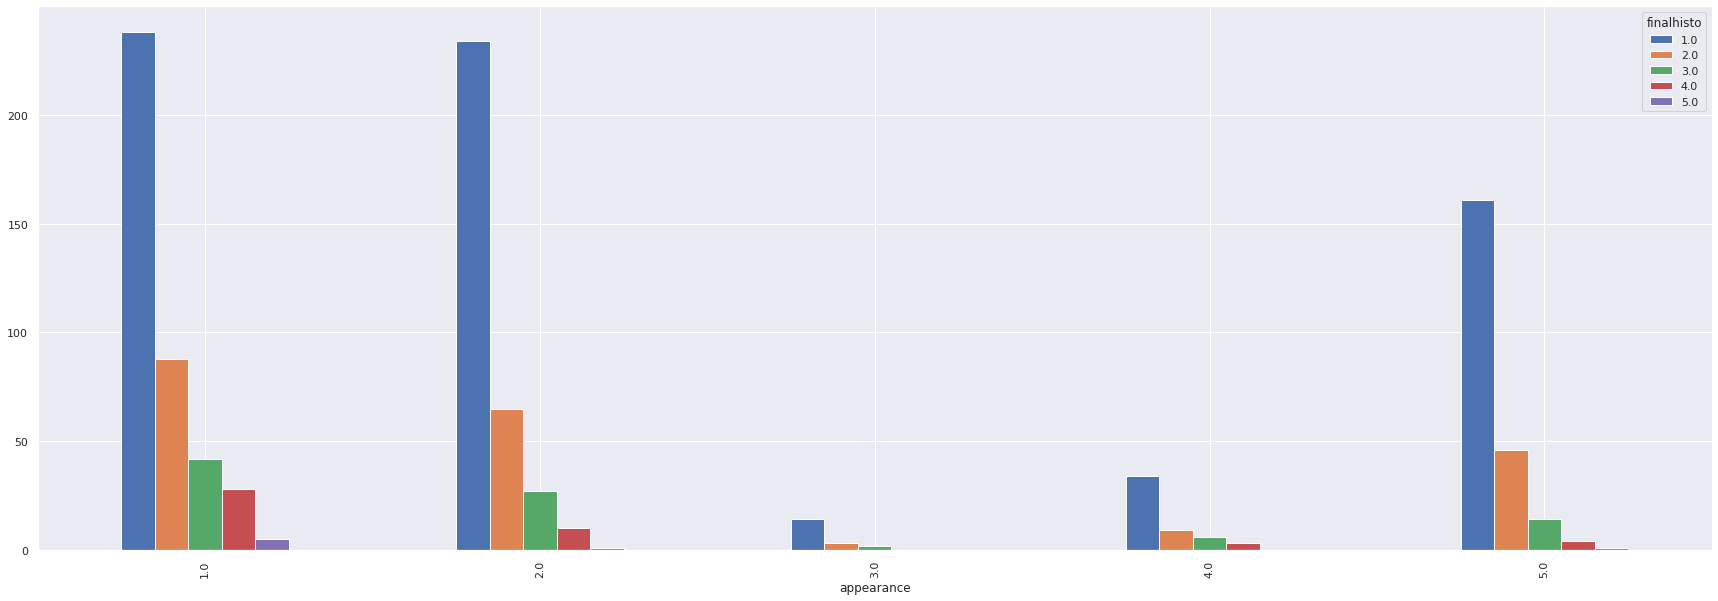

In [51]:
pd.crosstab(data['appearance'],data['finalhisto']).plot(kind='bar',figsize=(30,10))

<AxesSubplot:xlabel='menopaus'>

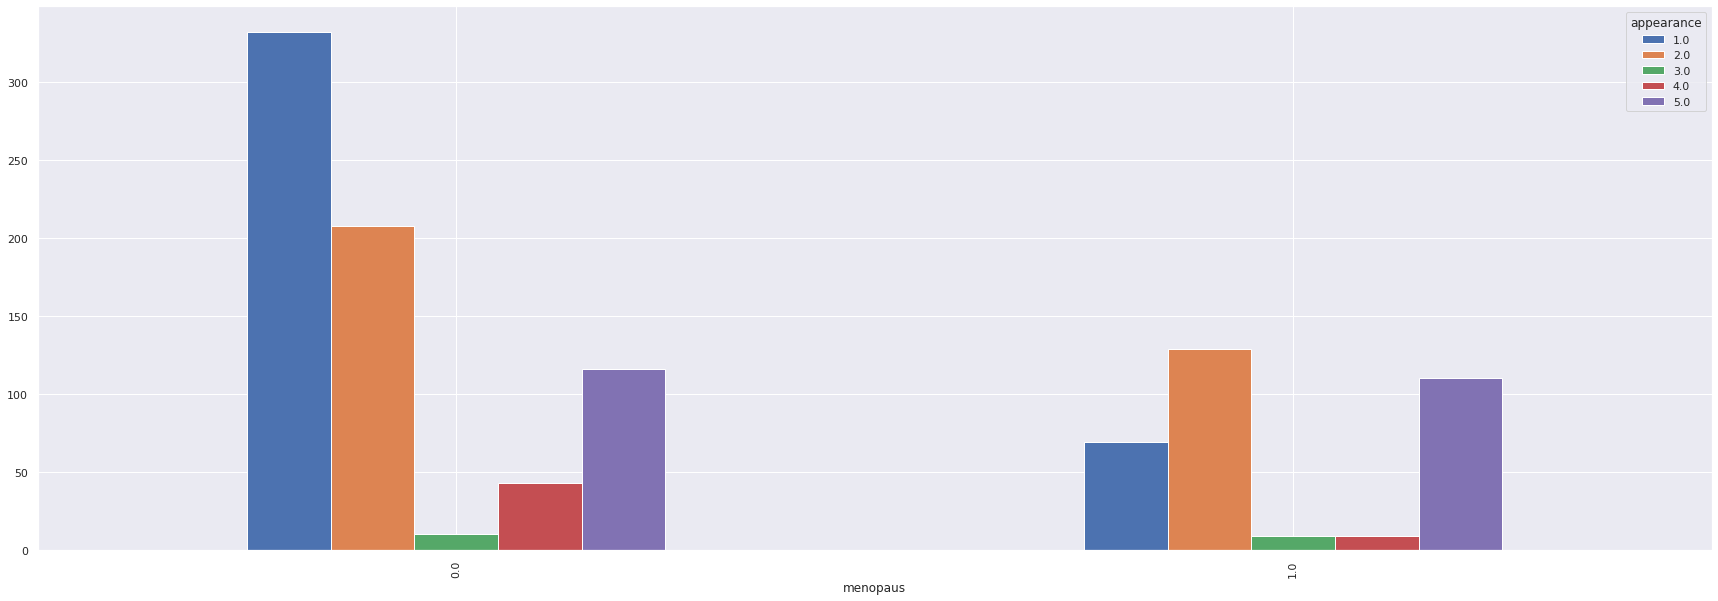

In [52]:
pd.crosstab(data['menopaus'],data['appearance']).plot(kind='bar',figsize=(30,10))

<AxesSubplot:xlabel='age'>

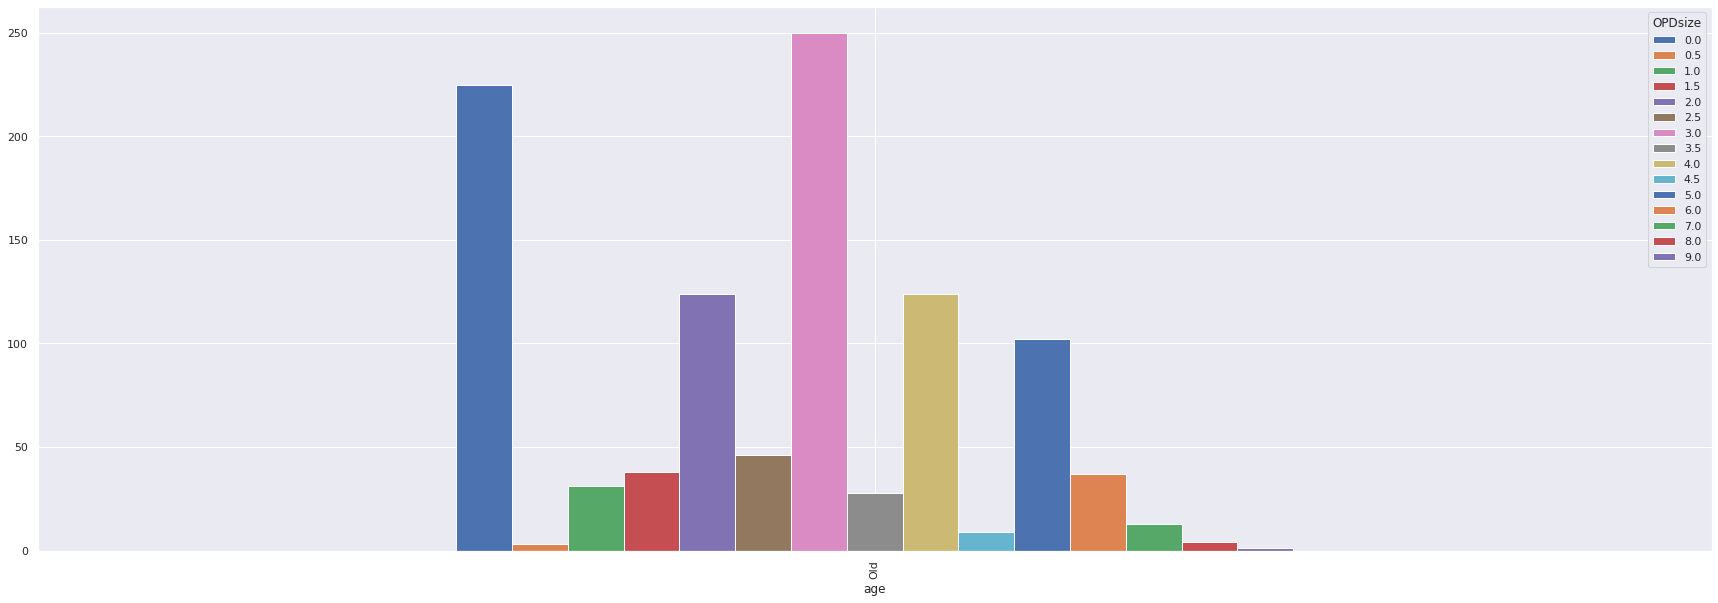

In [53]:
pd.crosstab(data['age'],data['OPDsize']).plot(kind='bar',figsize=(30,10))

Ex.2
Please explore this dataset and report at least 5 facts about this dataset